# The Catch and Shoot Opportunity

In [463]:
import pandas as pd
import numpy as np
%pylab inline

data = pd.read_csv('shots.csv', header = 0)
# let's add a new column that is distance from basket
data['dis_from_basket'] = (data['shot_x']**2 + data['shot_y']**2)**(0.5)

# I only want to analyze a purposeful C&S, erase the half court heeves
df = data[data['dis_from_basket'] < 45]
df.index = arange(9723)
df.describe()

Populating the interactive namespace from numpy and matplotlib


C:\Users\Konner\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


,shot_x,shot_y,shooter_velocity_ft_sec,shooter_velocity_angle,dribbles_before,made,defender_distance,defender_angle,defender_velocity_ft_sec,defender_velocity_angle,dis_from_basket
count,9723.000000,9723.000000,9723.000000,9723.000000,9723.000000,9723.000000,9723.000000,9723.000000,9723.000000,9723.000000,9723.000000
mean,-0.175455,10.323153,4.612536,6.564084,2.534300,0.409853,4.258414,0.877473,6.555565,-0.280745,15.215438
std,11.434963,9.722710,3.701196,79.679132,4.162525,0.491832,2.992019,67.850318,3.463014,72.030557,10.018252
min,-24.908288,-5.319402,0.000000,-180.000000,0.000000,0.000000,0.000000,-180.000000,0.000000,-180.000000,0.050654
25%,-6.488140,1.970956,1.718197,-42.401065,0.000000,0.000000,2.282717,-28.951498,3.729579,-41.221501,4.944319
50%,-0.104395,6.921170,3.387317,7.455990,1.000000,0.000000,3.683918,1.381155,6.281873,-0.697112,16.304538
75%,5.805719,18.342501,7.144747,56.598372,3.000000,1.000000,5.536006,30.961678,9.438055,39.840450,24.237474
max,25.541160,43.208419,12.000000,180.000000,29.000000,1.000000,39.064093,180.000000,12.000000,180.000000,44.786390


# Simple FGP Comparison

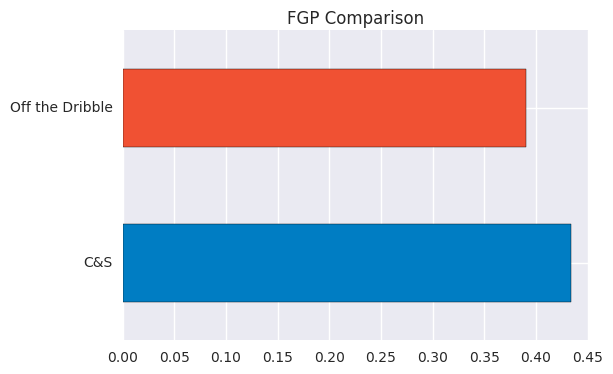

In [505]:
df[df['dribbles_before']==0]['made'].value_counts()
FGP = [df[df['dribbles_before']==0]['made'].mean(), df[df['dribbles_before']!=0]['made'].mean()]

ThunderBlue = '#007DC3'
ThunderOrange = '#F05133'

myColors = [ThunderBlue, ThunderOrange]

shotType = ('C&S', 'Off the Dribble')

pd.DataFrame(FGP, shotType).plot(kind = 'barh', color = myColors, title = 'FGP Comparison', legend = None)

# C&S FGP From Different Ranges

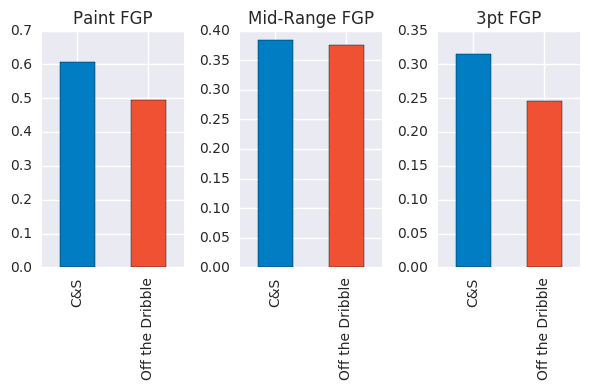

In [465]:
# In paint, I am qualifying as within 10 ft of hoop
# Mid-Range is 10-22 ft away from hoop
# 3pt I'm saying is 22 or more, I am generalizing since I know at some points on the 3pt line, it is 23.75 ft away

paint_avgs = [df[(df['dribbles_before'] == 0) & (df['dis_from_basket'] < 10)]['made'].mean(),
              df[(df['dribbles_before'] != 0) & (df['dis_from_basket'] < 10)]['made'].mean()]

mid_range_avgs = [df[(df['dribbles_before'] == 0) & (df['dis_from_basket'] >= 10) & (df['dis_from_basket'] < 22)]['made'].mean(),
              df[(df['dribbles_before'] != 0) & (df['dis_from_basket'] >= 10) & (df['dis_from_basket'] < 22)]['made'].mean()]

three_pt_avgs = [df[(df['dribbles_before'] == 0) & (df['dis_from_basket'] >= 22)]['made'].mean(),
              df[(df['dribbles_before'] != 0) & (df['dis_from_basket'] >= 22)]['made'].mean()]

fig, axs = plt.subplots(1,3)

pd.DataFrame(paint_avgs, shotType).plot(kind = 'bar', color = myColors, title = "Paint FGP", legend = None, ax = axs[0])
pd.DataFrame(mid_range_avgs, shotType).plot(kind = 'bar', color = myColors, title = "Mid-Range FGP",legend = None, ax = axs[1])
pd.DataFrame(three_pt_avgs, shotType).plot(kind = 'bar', color = myColors, title = "3pt FGP", legend = None, ax = axs[2])
plt.tight_layout()

# Analyzing C&S Success vs. Failure Traits at Different Ranges

# Paint Characteristics

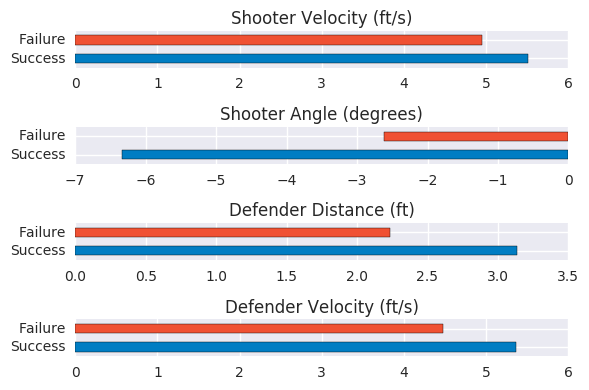

In [466]:
csShooter_vel_avg_p = [df[(df['dribbles_before']==0) & (df['made']==1) & (df['dis_from_basket'] < 10)]['shooter_velocity_ft_sec'].mean(),
                    df[(df['dribbles_before']==0) & (df['made']==0) & (df['dis_from_basket'] < 10)]['shooter_velocity_ft_sec'].mean()]

csShooter_ang_avg_p = [df[(df['dribbles_before']==0) & (df['made']==1) & (df['dis_from_basket'] < 10)]['shooter_velocity_angle'].mean(),
                    df[(df['dribbles_before']==0) & (df['made']==0) & (df['dis_from_basket'] < 10)]['shooter_velocity_angle'].mean()]

csDefender_dis_avg_p = [df[(df['dribbles_before']==0) & (df['made']==1) & (df['dis_from_basket'] < 10)]['defender_distance'].mean(),
                    df[(df['dribbles_before']==0) & (df['made']==0) & (df['dis_from_basket'] < 10)]['defender_distance'].mean()]

csDefender_vel_avg_p = [df[(df['dribbles_before']==0) & (df['made']==1) & (df['dis_from_basket'] < 10)]['defender_velocity_ft_sec'].mean(),
                    df[(df['dribbles_before']==0) & (df['made']==0) & (df['dis_from_basket'] < 10)]['defender_velocity_ft_sec'].mean()]

fig, axs = plt.subplots(4,1)

lst = ('Success', 'Failure')
pd.DataFrame(csShooter_vel_avg_p, lst).plot(kind = 'barh', title = 'Shooter Velocity (ft/s)', color = myColors, legend = None, ax = axs[0])
pd.DataFrame(csShooter_ang_avg_p, lst).plot(kind = 'barh', title = 'Shooter Angle (degrees)', color = myColors, legend = None, ax = axs[1])
pd.DataFrame(csDefender_dis_avg_p, lst).plot(kind = 'barh', title = 'Defender Distance (ft)', color = myColors, legend = None, ax = axs[2])
pd.DataFrame(csDefender_vel_avg_p, lst).plot(kind = 'barh', title = 'Defender Velocity (ft/s)',color = myColors, legend = None, ax = axs[3])
plt.tight_layout()

# Mid-Range Characteristics

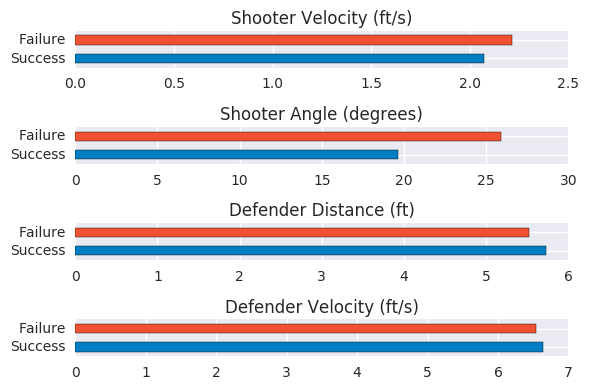

In [467]:
fig, axs = plt.subplots(4,1)

csShooter_vel_avg_mr = [df[(df['dribbles_before']==0) & (df['made']==1) & (df['dis_from_basket'] >= 10) & (df['dis_from_basket'] < 22)]['shooter_velocity_ft_sec'].mean(),
                    df[(df['dribbles_before']==0) & (df['made']==0) & (df['dis_from_basket'] >= 10) & (df['dis_from_basket'] < 22)]['shooter_velocity_ft_sec'].mean()]

csShooter_ang_avg_mr = [df[(df['dribbles_before']==0) & (df['made']==1) & (df['dis_from_basket'] >= 10) & (df['dis_from_basket'] < 22)]['shooter_velocity_angle'].mean(),
                    df[(df['dribbles_before']==0) & (df['made']==0) & (df['dis_from_basket'] >= 10) & (df['dis_from_basket'] < 22)]['shooter_velocity_angle'].mean()]

csDefender_dis_avg_mr = [df[(df['dribbles_before']==0) & (df['made']==1) & (df['dis_from_basket'] >= 10) & (df['dis_from_basket'] < 22)]['defender_distance'].mean(),
                    df[(df['dribbles_before']==0) & (df['made']==0) & (df['dis_from_basket'] >= 10) & (df['dis_from_basket'] < 22)]['defender_distance'].mean()]

csDefender_vel_avg_mr = [df[(df['dribbles_before']==0) & (df['made']==1) & (df['dis_from_basket'] >= 10) & (df['dis_from_basket'] < 22)]['defender_velocity_ft_sec'].mean(),
                    df[(df['dribbles_before']==0) & (df['made']==0) & (df['dis_from_basket'] >= 10) & (df['dis_from_basket'] < 22)]['defender_velocity_ft_sec'].mean()]



pd.DataFrame(csShooter_vel_avg_mr, lst).plot(kind = 'barh', title = 'Shooter Velocity (ft/s)', color = myColors, legend = None, ax = axs[0])
pd.DataFrame(csShooter_ang_avg_mr, lst).plot(kind = 'barh', title = 'Shooter Angle (degrees)', color = myColors, legend = None, ax = axs[1])
pd.DataFrame(csDefender_dis_avg_mr, lst).plot(kind = 'barh', title = 'Defender Distance (ft)', color = myColors, legend = None, ax = axs[2])
pd.DataFrame(csDefender_vel_avg_mr, lst).plot(kind = 'barh', title = 'Defender Velocity (ft/s)',color = myColors, legend = None, ax = axs[3])
plt.tight_layout()

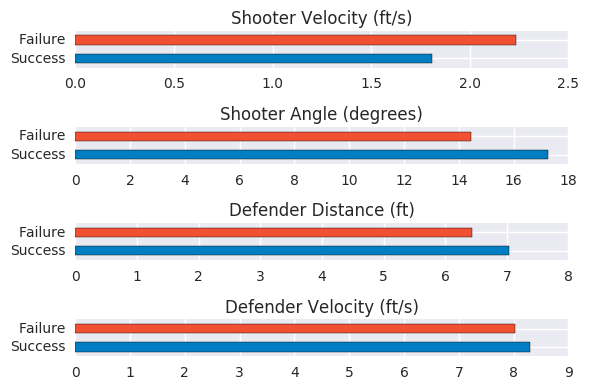

In [468]:
csShooter_vel_avg_3 = [df[(df['dribbles_before']==0) & (df['made']==1) & (df['dis_from_basket'] >= 22)]['shooter_velocity_ft_sec'].mean(),
                    df[(df['dribbles_before']==0) & (df['made']==0) & (df['dis_from_basket'] >= 22)]['shooter_velocity_ft_sec'].mean()]

csShooter_ang_avg_3 = [df[(df['dribbles_before']==0) & (df['made']==1) & (df['dis_from_basket'] >= 22)]['shooter_velocity_angle'].mean(),
                    df[(df['dribbles_before']==0) & (df['made']==0) & (df['dis_from_basket'] >= 22)]['shooter_velocity_angle'].mean()]

csDefender_dis_avg_3 = [df[(df['dribbles_before']==0) & (df['made']==1) & (df['dis_from_basket'] >= 22)]['defender_distance'].mean(),
                    df[(df['dribbles_before']==0) & (df['made']==0) & (df['dis_from_basket'] >= 22)]['defender_distance'].mean()]

csDefender_vel_avg_3 = [df[(df['dribbles_before']==0) & (df['made']==1) & (df['dis_from_basket'] >= 22)]['defender_velocity_ft_sec'].mean(),
                    df[(df['dribbles_before']==0) & (df['made']==0) & (df['dis_from_basket'] >= 22)]['defender_velocity_ft_sec'].mean()]

fig, axs = plt.subplots(4,1)

pd.DataFrame(csShooter_vel_avg_3, lst).plot(kind = 'barh', title = 'Shooter Velocity (ft/s)', color = myColors, legend = None, ax = axs[0])
pd.DataFrame(csShooter_ang_avg_3, lst).plot(kind = 'barh', title = 'Shooter Angle (degrees)', color = myColors, legend = None, ax = axs[1])
pd.DataFrame(csDefender_dis_avg_3, lst).plot(kind = 'barh', title = 'Defender Distance (ft)', color = myColors, legend = None, ax = axs[2])
pd.DataFrame(csDefender_vel_avg_3, lst).plot(kind = 'barh', title = 'Defender Velocity (ft/s)',color = myColors, legend = None, ax = axs[3])
plt.tight_layout()

# Key Points To Increase Success at Different Ranges
## In the Paint
- Take more shots when the defender is 3 or more feet away from the shooter
- Keep the shooter angle more negative (to the left of basket)
- The faster the shooter and defender is moving, the higher chance of success
## Mid Range
- Keep shooter angle positive (to the right) but closer to zero
## 3 pt
- Keep shooter velocity slower
- Shooter angle should be more positive (to the right)
- Take more shots when defender is 7 or more feet away from the shooter

# Visual of Shot-Taking On the Court

# All Shots Taken, Blue is made/Orange if missed

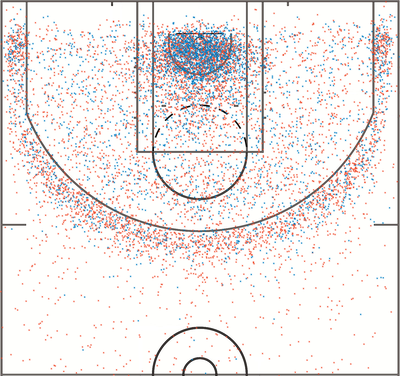

In [469]:
from PIL import Image, ImageFont, ImageDraw
import PIL
 
img = Image.open('halfCourt1.jpg')
draw = ImageDraw.Draw(img)
    
Yellow = 255,255,0

# look at the whole court now
for num in range(10000):
    x = data['shot_x'][num]
    y = data['shot_y'][num]
    # number conversion from a 50 x 47 half court
    if (data['made'][num] == 0):
        draw.text((x*29.3+722.5,y*29.04+137.95),"x", ThunderOrange)
    else:
        draw.text((x*29.3+722.5,y*29.04+137.95),"x",ThunderBlue)
img.resize((400,376), PIL.Image.ANTIALIAS)

# Whether Shots were C&S, Blue if yes/Orange if no

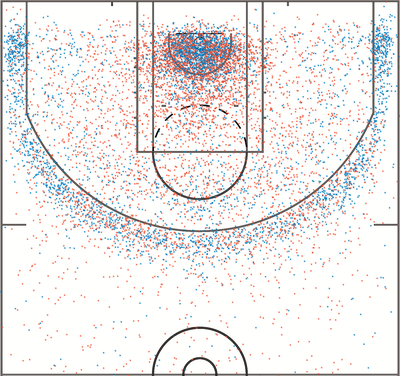

In [470]:
# looking at what shots were C&S and what shots weren't
img = Image.open('halfCourt1.jpg')
draw = ImageDraw.Draw(img)
    
# look at the whole court now
for num in range(10000):
    x = data['shot_x'][num]
    y = data['shot_y'][num]
    # number conversion from a 50 x 47 half court
    if (data['dribbles_before'][num] != 0):
        draw.text((x*29.3+722.5,y*29.04+137.95),"x", ThunderOrange)
    else:
        draw.text((x*29.3+722.5,y*29.04+137.95),"x",ThunderBlue)
img.resize((400,376), PIL.Image.ANTIALIAS)

# Whether C&S shot was successful, Blue if yes/Orange if no

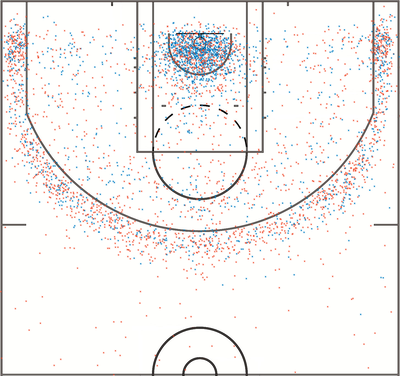

In [471]:
# Out of the C&S shots, showing which ones were made
img = Image.open('halfCourt1.jpg')
draw = ImageDraw.Draw(img)
    
# look at the whole court now
for num in range(10000):
    x = data['shot_x'][num]
    y = data['shot_y'][num]
    # number conversion from a 50 x 47 half court
    if (data['dribbles_before'][num] == 0):
        if (data['made'][num] == 1):
            draw.text((x*29.3+722.5,y*29.04+137.95),"x",ThunderBlue)
        else:
            draw.text((x*29.3+722.5,y*29.04+137.95),"x",ThunderOrange)
        
img.resize((400,376), PIL.Image.ANTIALIAS)

# Catch and Shoot Spots to Focus On/Avoid

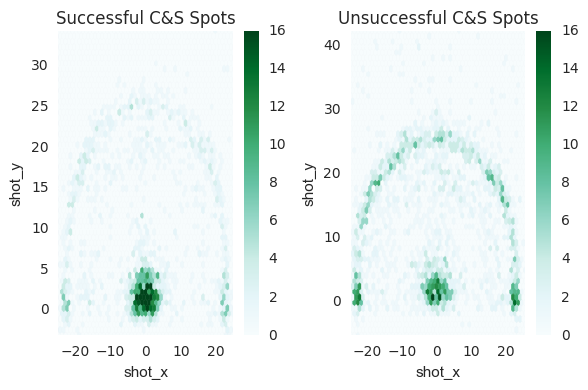

In [472]:
fig, axs = plt.subplots(1,2)

# create a DataFrame of all the successful C&S shots
dfS = df[(df['made']==1) & (df['dribbles_before']==0)]
dfS.plot.hexbin(x = 'shot_x', y = 'shot_y', gridsize = 50, ax = axs[0], title = 'Successful C&S Spots', vmax = 16)
# create DataFrame of all failed C&S shots
dfF = df[(df['made']==0) & (df['dribbles_before']==0)]
dfF.plot.hexbin(x = 'shot_x',y = 'shot_y', gridsize = 50, ax = axs[1], title = "Unsuccessful C&S Spots")

plt.tight_layout()

# Key Points
- Take many C&S Shots inside paint
- Worth taking 3pt shots from corners, particularly right side of hoop
- Avoid 3pt shots on upper reaches of arch if possible, team does it too often
- Mid-Range is not advisable